<a href="https://colab.research.google.com/github/joaopaulof19/cases-de-uso/blob/main/TIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
## **Processo Seletivo da TIM**  <img src="https://cdn-icons-png.flaticon.com/512/9653/9653444.png" width="7%">
***

<br>
<p align=center>
<img src="https://logosmarcas.net/wp-content/uploads/2021/03/TIM-Logo.png" width="30%"></p>
<br>

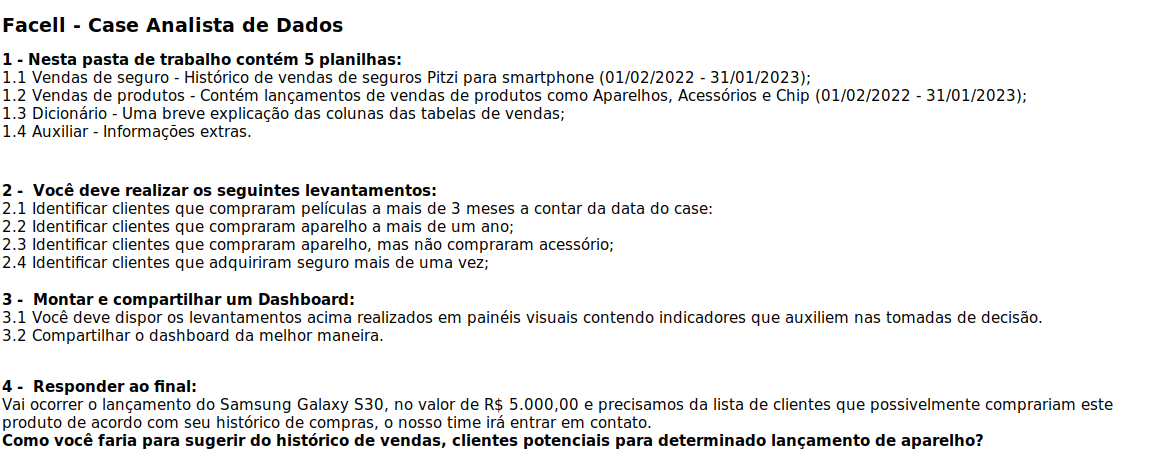

***
## **Carregamento de dependências** <img src="https://cdn-icons-png.flaticon.com/512/4461/4461808.png" width="5%">
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import re

from datetime import date

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

***
## **Lendo as abas da planilha** <img src="https://cdn-icons-png.flaticon.com/512/9798/9798110.png" width="5%">
***

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/TIM/Case - Analista de dados (1).xlsx'

In [ ]:
dicionario = pd.read_excel(path, sheet_name='Dicionário')
display(dicionario)

,Tabela,Nome da Coluna,Definição
0,Vendas de seguro,Loja,Filial na qual foi realizada a venda do seguro
1,Vendas de seguro,Data e hora,Autoexplicativo
2,Vendas de seguro,Modelo do aparelho,Aparelho para o qual foi realizada a venda do ...
3,Vendas de seguro,Preço do plano,Valor do seguro
4,Vendas de seguro,Vendedor,Vendedor do seguro
5,Vendas de seguro,Quantidade de Parcelas,Parcelamento do seguro
6,Vendas de seguro,Order ID,Identificador único do seguro
7,Vendas de seguro,ID do Plano,Identificador único do tipo de seguro (detalhe...
8,Vendas de seguro,CPF do Vendedor,Autoexplicativo
9,Vendas de seguro,CPF do Cliente,Autoexplicativo


In [ ]:
auxiliar = pd.read_excel(path, sheet_name='Auxiliar')
display(auxiliar)

,ID do Plano (Seguro),Descrição
0,199,Pitzi Total
1,68,Proteção de Tela
2,203,Garantia Estendida
3,71,Proteção Parcial


In [ ]:
vendas_produtos = pd.read_excel(path, sheet_name='Vendas de produtos')
display(vendas_produtos)

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
0,BA,16 TIM SALVADOR SHOPPING,2023-01-20 19:14:53.664,Devolução,ITSPFF - INTELLIGENT TPU SOFT PROTECTIVE FRONT...,ITSPFF - INTELLIGENT TPU SOFT PROTECTIVE FRONT...,ACESSORIOS,PELICULAS,1,-99.00,JOICE SAMPAIO DE SOUZA
1,BA,16 TIM SALVADOR SHOPPING,2023-01-02 11:01:09.523,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,15.00,LIVIA GOMES DE VASCONCELLOS
2,BA,16 TIM SALVADOR SHOPPING,2023-01-02 11:30:59.299,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,JUÇARA LOPES SANTOS PONTES
3,BA,16 TIM SALVADOR SHOPPING,2023-01-02 11:40:13.901,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,JUÇARA LOPES SANTOS PONTES
4,BA,16 TIM SALVADOR SHOPPING,2023-01-02 12:08:00.902,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,JUÇARA LOPES SANTOS PONTES
...,...,...,...,...,...,...,...,...,...,...,...
190797,RN,14 TIM MIDWAY PISO L2,2022-12-31 16:33:54.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,0.01,ROSANGELA MARIA DE OLIVEIRA
190798,RN,14 TIM MIDWAY PISO L2,2022-12-31 16:45:03.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,15.00,WESLLEY SOUZA WANDERLEI
190799,RN,14 TIM MIDWAY PISO L2,2022-12-31 16:56:02.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,0.01,ROSANGELA MARIA DE OLIVEIRA
190800,RN,14 TIM MIDWAY PISO L2,2022-12-31 16:59:32.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,0.01,ROSANGELA MARIA DE OLIVEIRA


In [ ]:
vendas_seguros = pd.read_excel(path, sheet_name='Vendas de seguro')
display(vendas_seguros)

,Loja,Data e hora,Modelo do aparelho,Preço do plano,Vendedor,Quantidade de Parcelas,Order ID,ID do Plano,Nome do cliente
0,Facell - Midway L2,2022-03-14 13:21:10,Galaxy A52s 5G 6/128.,809.76,Cinthya gabrielle soares dos santos,12,1613332,199,ADNILDE LOPES GALVAO DA SILVA
1,Facell - Alexandrino,2022-03-15 09:17:08,Galaxy S21 FE 6/128,1199.76,Mayara Ketly nascimento macedo,12,1614715,199,FRAMIR E SILVAFERNANDES
2,Facell - Alexandrino,2022-03-15 14:51:17,Galaxy A52s 5G 6/128.,809.76,GECIANE JERONIMO SILVA,12,1615156,199,MARIA MAGNA COSTA FERNANDES
3,Facell - Alexandrino,2022-03-15 15:17:12,Galaxy A52s 5G 6/128.,809.76,ELANDSON DE LIMA CAMPOS,12,1615189,199,MARLENE DA SILVA LIRA
4,Facell - Alexandrino,2022-03-15 15:22:35,Galaxy A32 5G 4/128,659.76,Mayara Ketly nascimento macedo,12,1615195,199,IVANALDO DOS SANTOS MEDERIOS
...,...,...,...,...,...,...,...,...,...
4268,Facell- Salvador shopping,2023-01-10 18:51:43,Edge 30 Neo 5G 8/256,1049.76,Matheus Silva Santana,18,1973965,199,NELMENIA FONTEBRANCA DE SOUZA SANTOS
4269,Facell- Salvador shopping,2023-01-25 13:14:20,Moto G22 4/128,479.70,Amanda dias leal de Almeida,4,1989780,199,GERALDO ALVES COELHO
4270,Facell- Salvador shopping,2023-01-28 16:28:12,Moto G52 4/128,539.64,Andréia Almeida,12,1992638,199,INGRID MENEZES AQUILINO
4271,Facell- Salvador shopping,2023-01-28 16:49:40,Moto G52 4/128,539.64,Andréia Almeida,12,1992649,199,JULIANA MATOS SANTANA


***
## **Levantamento** <img src="https://cdn-icons-png.flaticon.com/512/809/809460.png" width="5%">
***

In [ ]:
vendas_produtos.dtypes

Área                           object
Filial                         object
Data Pedido            datetime64[ns]
Tipo Pedido                    object
Descrição Comercial            object
Descrição                      object
Grupo Estoque                  object
Sub Grupo                      object
Qtde                            int64
Valor Caixa                   float64
Nome Cliente                   object
dtype: object

### **2.1 Identificar clientes que compraram películas a mais de 3 meses a contar da data do case** <img src="https://cdn-icons-png.flaticon.com/512/4423/4423939.png" width="5%">

In [ ]:
vendas_produtos.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
26855,RN,13 ALEXANDRINO,2022-02-01 08:44:52.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,15.00,JOSE GOMES
26856,RN,13 ALEXANDRINO,2022-02-01 08:50:51.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,15.00,Jefferson luan vitorino pereira
18811,BA,16 TIM SALVADOR SHOPPING,2022-02-01 09:19:44.000,Venda,CARREGADOR ORIGINAL TURBO USB-TIPO C 15W - SAM...,CARREGADOR ORIGINAL TURBO USB-TIPO C 15W - SAM...,ACESSORIOS,NaN,1,180.00,claudiane almada oliveira torquato
18810,BA,16 TIM SALVADOR SHOPPING,2022-02-01 09:19:44.000,Venda,PULSEIRA BAND M5/M6,PULSEIRA BAND M5/M6,ACESSORIOS,NaN,1,53.90,claudiane almada oliveira torquato
22224,BA,23 TIM SALVADOR NORTE,2022-02-01 09:28:39.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 280,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,15.00,ANTONIO LINDO DE JESUS
...,...,...,...,...,...,...,...,...,...,...,...
2437,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:09:03.917,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,DEIVISON DOS SANTOS SANTOS
2438,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:11:42.720,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,DEIVISON DOS SANTOS SANTOS
2439,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:18:54.720,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,romeu oliveira de jesus
2440,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:26:04.992,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,romeu oliveira de jesus


In [ ]:
# Valores exclusivos da coluna "Sub Grupo"
vendas_produtos['Sub Grupo'].unique()

array(['PELICULAS', nan, 'OUTROS', 'SMARTPHONE', 'CAPAS', 'FONES',
       'CARREGADOR', 'FONTE', 'ELETRONICO', 'CABOS', 'PELICULA', 'CAPA',
       'JBL', 'cARTEIRA'], dtype=object)

Foi verificado que existiam dois produtos com nomes diferentes que remetem ao produto analisado:
*   PELICULAS;
*   PELICULA



In [ ]:
# filtra todas as vendas de película
vendas_peliculas = vendas_produtos[(vendas_produtos['Sub Grupo'] == 'PELICULAS') 
                                  | (vendas_produtos['Sub Grupo'] == 'PELICULA')]

In [ ]:
# Há nomes escritos em maiusculos e outros em minusculos, vamos padronizar
vendas_peliculas['Nome Cliente'] = vendas_peliculas['Nome Cliente'].str.lower()

In [ ]:
vendas_peliculas.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
74656,RN,01 TIM MIDWAY,2022-05-15 16:19:32.000,Venda,FILME IMPORTADO TRASEIRO TPU SOFT COURO,FILME IMPORTADO TRASEIRO TPU SOFT COURO,ACESSORIOS,PELICULA,1,100.00,francisco de assis ferreira dos santos
80785,RN,14 TIM MIDWAY PISO L2,2022-05-16 11:54:23.000,Venda,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,ACESSORIOS,PELICULA,2,139.80,carlos pereira da silva
74969,RN,01 TIM MIDWAY,2022-05-19 16:43:33.000,Venda,FILME IMPORTADO TRASEIRO TPU SOFT COURO,FILME IMPORTADO TRASEIRO TPU SOFT COURO,ACESSORIOS,PELICULA,2,0.60,simone eliziaria da silva
81071,RN,14 TIM MIDWAY PISO L2,2022-05-24 18:12:35.000,Venda,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,ACESSORIOS,PELICULA,1,69.90,zenaide brito da silva
81221,RN,14 TIM MIDWAY PISO L2,2022-05-27 21:34:26.000,Venda,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,FILME IMPORTADO FRONT TPU SOFT ANTI-REFLEXO FOSCA,ACESSORIOS,PELICULA,1,99.55,ingrid poliana silva freitas
...,...,...,...,...,...,...,...,...,...,...,...
10988,RN,01 TIM MIDWAY,2023-01-31 20:48:07.546,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,129.00,jose maria de assis
12127,RN,02 TIM NATAL SHOPPING,2023-01-31 21:25:52.349,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,0.02,marcus vinicius soares alves
12128,RN,02 TIM NATAL SHOPPING,2023-01-31 21:27:04.234,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,129.00,marcus vinicius soares alves
10995,RN,01 TIM MIDWAY,2023-01-31 21:28:59.146,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,80.00,nelia maria de medeiros firmino


Foi verificado que nem todos os registros são de vendas, tem alguns de troca e outros de devolução. Para essa análise, vamos considerar somente vendas. 

In [ ]:
# Tipo Pedido
vendas_peliculas['Tipo Pedido'].value_counts()

Venda        3277
Devolução     312
Troca           4
Name: Tipo Pedido, dtype: int64

In [ ]:
# filtra todas as vendas de película
vendas_peliculas = vendas_peliculas[(vendas_produtos['Tipo Pedido'] == 'Venda')]
vendas_peliculas['Tipo Pedido'].value_counts()

Venda    3277
Name: Tipo Pedido, dtype: int64

In [ ]:
# atribui a variável 'hoje' a data atual
hoje = date.today()
# atribui a variavel 'data_3meses' uma data de 3 meses atrás
data_3meses = hoje - pd.DateOffset(months=3)
# atribui a variável 'vendas_peliculas_3'todos os registros que tiveram vendas nos ultimos 3 meses
vendas_peliculas_3 = vendas_peliculas[vendas_peliculas['Data Pedido'] >= data_3meses]

In [ ]:
vendas_peliculas_3.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
188618,RN,13 ALEXANDRINO,2022-12-15 09:54:18.000,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,100.00,francisco sales de queiroz
175378,BA,17 TIM LOJA SHOPPING DA BAHIA,2022-12-15 10:19:24.000,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,100.00,ednalva macedo santos
183586,RN,01 TIM MIDWAY,2022-12-15 10:31:35.000,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,80.00,joceval pereira de andrade
183585,RN,01 TIM MIDWAY,2022-12-15 10:31:35.000,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,80.00,joceval pereira de andrade
188625,RN,13 ALEXANDRINO,2022-12-15 10:51:40.000,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,129.00,pedro sergio da silva
...,...,...,...,...,...,...,...,...,...,...,...
10988,RN,01 TIM MIDWAY,2023-01-31 20:48:07.546,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,129.00,jose maria de assis
12127,RN,02 TIM NATAL SHOPPING,2023-01-31 21:25:52.349,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,0.02,marcus vinicius soares alves
12128,RN,02 TIM NATAL SHOPPING,2023-01-31 21:27:04.234,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,129.00,marcus vinicius soares alves
10995,RN,01 TIM MIDWAY,2023-01-31 21:28:59.146,Venda,PELICULA DION SOFT TPU - TRANSPARENTE,PELICULA DION SOFT TPU - TRANSPARENTE,ACESSÓRIOS COM SERIAL,PELICULAS,1,80.00,nelia maria de medeiros firmino


In [ ]:
# Quantidade de vendas pelicula nos ultimos 3 meses
vendas_peliculas_3['Nome Cliente'].count()

2708

In [ ]:
# nome dos clientes que compraram pelicula nos ultimos 3 meses
conjunto_clientes_compraram_peliculas = set(vendas_peliculas_3['Nome Cliente'])

Ao todo, durante os últimos 3 meses, houve um total de 2025 clientes que adquiriram películas. Para identificar quais clientes não efetuaram compras de películas neste período, é necessário selecionar todos os clientes da base de dados que realizaram compras de películas anteriormente, mas que não constam na lista dos 2025 clientes que adquiriram películas nos últimos 3 meses.

In [ ]:
# Quantidade de clientes que compraram pelicula nos ultimos 3 meses
len(conjunto_clientes_compraram_peliculas)

1996

In [ ]:
# Conjunto de nome de todos os clientes que já compraram películas
conjunto_clientes = set(vendas_peliculas['Nome Cliente'])

In [ ]:
# Quantidade de clientes que já compraram pelicula
len(conjunto_clientes)

2395

No total de 370 pessoas compraram pelícuas a mais de 3 meses. 

In [ ]:
# Quantidade de clientes que compraram pelicula a mais de 3 meses
len(conjunto_clientes-conjunto_clientes_compraram_peliculas)

399

Abaixo segue a lista dos clientes que não adquiriram películas nos últimos 3 meses. Esta lista pode ser útil em uma base de dados mais completa, como aquelas que contêm informações de e-mail ou número de telefone. Uma possibilidade seria enviar um e-mail ou SMS para esta lista de pessoas, oferecendo descontos em películas para aumentar as vendas. Isso pode ser uma estratégia eficaz para estimular esses clientes a fazerem uma nova compra e, assim, impulsionar os resultados da empresa.

In [ ]:
# Conjunto de nome de clientes compraram películas a mais de 3 meses
clientes_que_compraram_pelicula_a_mais_de_3_meses = conjunto_clientes - conjunto_clientes_compraram_peliculas
clientes_que_compraram_pelicula_a_mais_de_3_meses

{'abida silva de sousa ',
 'ademario de souza araujo',
 'ademario lacerda de castro',
 'afonso rodrigues da silva',
 'afranio mariano da costa',
 'aguida de lima',
 'alan cota da fonseca',
 'albaniza bezerra da rocha',
 'albeci barbosa de lima ',
 'alcileide paulino morais',
 'aldo figallo orellano',
 'alexandre ney de lima carvalho ',
 'alexsandra da silva duarte assuncao',
 'aline pereira da costa gomes da silva',
 'alvaro sergio de carvalho',
 'alynne carla da silva ramos',
 'alzenir oliveira da silva',
 'ana carla de sousa alexandre',
 'ana celia pontes',
 'ana cristina de medeiros araujo',
 'ana karina da camara dantas',
 'ana karina dos santos santiago',
 'ana kelly sousa dos santos',
 'ana maria barbalho maia costa',
 'ana maria toscano dantas',
 'ana paula de queiroz ',
 'anderson nobre galhardo',
 'andrea neves romao',
 'andrica gardenia miranda de oliveira',
 'angela maria lima lopes',
 'angela maria souto',
 'angelo jose gondim de oliveira',
 'antonio alves da costa',
 'anto

In [ ]:
# Criação do dataframe a partir do conjunto
df = pd.DataFrame(list(clientes_que_compraram_pelicula_a_mais_de_3_meses), columns=['Lista de clientes'])

# Exportação do dataframe para um arquivo xlsx
caminho = '/content/drive/MyDrive/Colab Notebooks/TIM/clientes_que_compraram_pelicula_a_mais_de_3_meses.xlsx'
df.to_excel(caminho, index=False)



### **2.2 Identificar clientes que compraram aparelho a mais de um ano** <img src="https://cdn-icons-png.flaticon.com/512/925/925049.png" width="5%">

In [ ]:
vendas_produtos.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
26855,RN,13 ALEXANDRINO,2022-02-01 08:44:52.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,15.00,JOSE GOMES
26856,RN,13 ALEXANDRINO,2022-02-01 08:50:51.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 240,TIMCHIP PLANO POS TRIPLO 4G HLR 240,CHIP,NaN,1,15.00,Jefferson luan vitorino pereira
18811,BA,16 TIM SALVADOR SHOPPING,2022-02-01 09:19:44.000,Venda,CARREGADOR ORIGINAL TURBO USB-TIPO C 15W - SAM...,CARREGADOR ORIGINAL TURBO USB-TIPO C 15W - SAM...,ACESSORIOS,NaN,1,180.00,claudiane almada oliveira torquato
18810,BA,16 TIM SALVADOR SHOPPING,2022-02-01 09:19:44.000,Venda,PULSEIRA BAND M5/M6,PULSEIRA BAND M5/M6,ACESSORIOS,NaN,1,53.90,claudiane almada oliveira torquato
22224,BA,23 TIM SALVADOR NORTE,2022-02-01 09:28:39.000,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 280,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,15.00,ANTONIO LINDO DE JESUS
...,...,...,...,...,...,...,...,...,...,...,...
2437,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:09:03.917,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,DEIVISON DOS SANTOS SANTOS
2438,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:11:42.720,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,DEIVISON DOS SANTOS SANTOS
2439,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:18:54.720,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,romeu oliveira de jesus
2440,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-31 22:26:04.992,Venda,TIMCHIP PLANO POS TRIPLO 4G HLR 270,TIMCHIP PLANO POS TRIPLO 4G HLR 270,CHIP,NaN,1,0.01,romeu oliveira de jesus


In [ ]:
# valores exclusivos da coluna "Grupo Estoque"
vendas_produtos['Grupo Estoque'].unique()

array(['ACESSORIOS', 'CHIP', 'RECARGA ELETRONICA', 'APARELHO',
       'ACESSÓRIOS COM SERIAL', 'GARANTIAS E SEGUROS'], dtype=object)

In [ ]:
# filtra todos os registros "Aparelho" para a coluna 'Grupo Estoque'
aparelho = vendas_produtos[(vendas_produtos['Grupo Estoque'] == 'APARELHO')]

In [ ]:
# Há nomes escritos em maiusculos e outros em minusculos, vamos padronizar
aparelho['Nome Cliente'] = aparelho['Nome Cliente'].str.lower()

In [ ]:
aparelho.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
19397,BA,17 TIM LOJA SHOPPING DA BAHIA,2022-02-01 09:45:35.000,Venda,MOTOROLA MOTO E6I,MOTOROLA MOTO E6I-CINZA TITANIUM,APARELHO,NaN,1,899.0,sandra silva dos santos
17385,BA,21 TIM PARALELA,2022-02-01 10:12:30.000,Venda,MOTOROLA EDGE 20 LITE,MOTOROLA EDGE 20 LITE-GRAFITE,APARELHO,NaN,1,2099.0,nayra macedo araujo
26857,RN,13 ALEXANDRINO,2022-02-01 10:18:08.000,Venda,APPLE IPHONE 12 64GB,APPLE IPHONE 12 64GB-BRANCO NAC,APARELHO,NaN,1,5299.0,daniel nobrega pereira de macedo
17948,BA,22 TIM BELA VISTA,2022-02-01 10:23:37.000,Venda,SAMSUNG GALAXY A02S,SAMSUNG GALAXY A02S-PRETO,APARELHO,NaN,1,899.0,josiel lima de jesus
19401,BA,17 TIM LOJA SHOPPING DA BAHIA,2022-02-01 10:25:04.000,Venda,MOTOROLA MOTO E6I,MOTOROLA MOTO E6I-CINZA TITANIUM,APARELHO,NaN,1,799.0,rosana da paixao caldas da silva
...,...,...,...,...,...,...,...,...,...,...,...
8250,CE,11 TIM JOQUEI CLUBE,2023-01-31 20:21:40.723,Venda,MOTOROLA MOTO G82 5G,MOTOROLA MOTO G82 5G-PRETO,APARELHO,SMARTPHONE,1,999.0,leandro nobre de menezes
10987,RN,01 TIM MIDWAY,2023-01-31 20:38:46.032,Venda,SAMSUNG GALAXY A13 128GB,SAMSUNG GALAXY A13 128GB-AZUL AM,APARELHO,OUTROS,1,699.0,jose maria de assis
12126,RN,02 TIM NATAL SHOPPING,2023-01-31 21:16:25.392,Venda,APPLE IPHONE 14 256GB,APPLE IPHONE 14 256GB-PRETO,APARELHO,SMARTPHONE,1,6199.0,marcus vinicius soares alves
10993,RN,01 TIM MIDWAY,2023-01-31 21:18:05.702,Venda,SAMSUNG GALAXY A33 5G,SAMSUNG GALAXY A33 5G-BRANCO AM,APARELHO,OUTROS,1,1599.0,nelia maria de medeiros firmino


In [ ]:
# Tipo Pedido
aparelho['Tipo Pedido'].value_counts()

Venda        30453
Devolução      169
Name: Tipo Pedido, dtype: int64

In [ ]:
# filtra todas as vendas de aparelho
vendas_aparelho = aparelho[(vendas_produtos['Tipo Pedido'] == 'Venda')]
vendas_aparelho['Tipo Pedido'].value_counts()

Venda    30453
Name: Tipo Pedido, dtype: int64

In [ ]:
# atribui a variavel 'data_3meses' uma data de 1 ano atrás
data_1ano = hoje - pd.DateOffset(years=1)
print(data_1ano)
# atribui a variável 'vendas_aparelho_1ano' todos os registros que tiveram vendas no ultimo ano
vendas_aparelho_1ano = vendas_aparelho[vendas_aparelho['Data Pedido'] >= data_1ano]

2022-03-15 00:00:00


In [ ]:
vendas_aparelho_1ano.sort_values(by='Data Pedido')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
38505,BA,23 TIM SALVADOR NORTE,2022-03-15 00:00:00.000,Venda,SAMSUNG GALAXY S21 FE,SAMSUNG GALAXY S21 FE-PRETO AM,APARELHO,SMARTPHONE,1,2374.05,roberto oliveira santos
45416,RN,01 TIM MIDWAY,2022-03-15 00:00:00.000,Venda,SAMSUNG GALAXY A52S 5G,SAMSUNG GALAXY A52S 5G N-PRETO,APARELHO,NaN,1,2100.00,valdilene maria do nascimento
45417,RN,01 TIM MIDWAY,2022-03-15 00:00:00.000,Venda,SAMSUNG GALAXY A32 5G,SAMSUNG GALAXY A32 5G-PRETO AM,APARELHO,NaN,1,1899.00,hilda costa de oliveira
45418,RN,01 TIM MIDWAY,2022-03-15 00:00:00.000,Venda,SAMSUNG GALAXY A52S 5G,SAMSUNG GALAXY A52S 5G N-PRETO,APARELHO,NaN,1,1999.00,eleni batista de melo
45428,RN,01 TIM MIDWAY,2022-03-15 00:00:00.000,Venda,SAMSUNG GALAXY A12,SAMSUNG GALAXY A12 CHIP-BRANCO AM,APARELHO,NaN,1,910.00,gabriel bezerra da silva
...,...,...,...,...,...,...,...,...,...,...,...
8250,CE,11 TIM JOQUEI CLUBE,2023-01-31 20:21:40.723,Venda,MOTOROLA MOTO G82 5G,MOTOROLA MOTO G82 5G-PRETO,APARELHO,SMARTPHONE,1,999.00,leandro nobre de menezes
10987,RN,01 TIM MIDWAY,2023-01-31 20:38:46.032,Venda,SAMSUNG GALAXY A13 128GB,SAMSUNG GALAXY A13 128GB-AZUL AM,APARELHO,OUTROS,1,699.00,jose maria de assis
12126,RN,02 TIM NATAL SHOPPING,2023-01-31 21:16:25.392,Venda,APPLE IPHONE 14 256GB,APPLE IPHONE 14 256GB-PRETO,APARELHO,SMARTPHONE,1,6199.00,marcus vinicius soares alves
10993,RN,01 TIM MIDWAY,2023-01-31 21:18:05.702,Venda,SAMSUNG GALAXY A33 5G,SAMSUNG GALAXY A33 5G-BRANCO AM,APARELHO,OUTROS,1,1599.00,nelia maria de medeiros firmino


In [ ]:
# nome dos clientes que compraram aparelho no ultimo ano
conjunto_clientes_compraram_aparelho_1ano = set(vendas_aparelho_1ano['Nome Cliente'])

In [ ]:
len(conjunto_clientes_compraram_aparelho_1ano)

24069

In [ ]:
# Conjunto de nome de todos os clientes que já compraram aparelho
conjunto_clientes_aparelho = set(vendas_aparelho['Nome Cliente'])

In [ ]:
len(conjunto_clientes_aparelho)

27648

In [ ]:
len(conjunto_clientes_aparelho-conjunto_clientes_compraram_aparelho_1ano)

3579

In [ ]:
# Conjunto de nome de clientes compraram aparelho a mais de 1 ano
clientes_compraram_aparelho_a_mais_de_1_ano = conjunto_clientes_aparelho-conjunto_clientes_compraram_aparelho_1ano
clientes_compraram_aparelho_a_mais_de_1_ano

{'rafael cavalcante ribeiro ramos',
 'antonio jose camelo ',
 'aline santiago da silva',
 'josivan camilo barbosa ',
 'henrique falcao passos',
 'isa marina de almeida carneiro dutra',
 'adelane de almeida chagas da gama ',
 'jacyara fabricio da silva ',
 'maria da solidade ferreira',
 'victor silva de lima',
 'cynara de sousa henrique rodrigues',
 'cinthia pinheiro campelo',
 'gleuce lima teixeira',
 'elionorio martins dos santos',
 'judson targino gurgel',
 'kelsio rodrigues gonçalves ',
 'maria gracas monteiro',
 'sanzia suelly rocha alves ',
 'pedro de medeiros filho ',
 'gildenor dos santos lima ',
 'gabriel  silva bispo ',
 'josevania da silva costa ',
 'luiz gonzaga de melo',
 'ascanio cezar cabussu neto',
 'ricardo guilherme oliveira barbosa ',
 'john lennon de almeida dantas',
 'magnolia alba gomes de souza',
 'shalimar farias da silva',
 'ilana felipe barros soares',
 'luzia moreira lopes ',
 'celina ferreira da silva',
 'clarice maria dos santos peixoto',
 'vitoria regia da 

In [ ]:
# Criação do dataframe a partir do conjunto
df = pd.DataFrame(list(clientes_compraram_aparelho_a_mais_de_1_ano), columns=['Lista de clientes'])

# Exportação do dataframe para um arquivo xlsx
caminho = '/content/drive/MyDrive/Colab Notebooks/TIM/clientes_aparelho_a_mais_de_1_ano.xlsx'
df.to_excel(caminho, index=False)



### **2.3 Identificar clientes que compraram aparelho, mas não compraram acessório** 
<img src="https://cdn-icons-png.flaticon.com/512/925/925049.png" width="5%"> <img src="https://cdn-icons-png.flaticon.com/512/190/190411.png" width="5%"> <img src="https://cdn-icons-png.flaticon.com/512/9900/9900777.png" width="5%">
<img src="https://cdn-icons-png.flaticon.com/512/1606/1606148.png" width="5%"> 

In [ ]:
vendas_produtos['Grupo Estoque'].unique()

array(['ACESSORIOS', 'CHIP', 'RECARGA ELETRONICA', 'APARELHO',
       'ACESSÓRIOS COM SERIAL', 'GARANTIAS E SEGUROS'], dtype=object)

In [ ]:
apenas_vendas_produtos = vendas_produtos[(vendas_produtos['Tipo Pedido'] == 'Venda')]

Para isso, será necessário obter o conjunto de todos os clientes que adquiriram aparelhos ou acessórios. Em seguida, deve-se extrair o conjunto de todos os clientes que compraram apenas acessórios. A partir disso, é possível fazer a subtração do primeiro conjunto pelo segundo, resultando em um conjunto de clientes que adquiriram apenas aparelhos. Com essa informação, a empresa pode ter uma compreensão mais clara do perfil de seus clientes e desenvolver estratégias de marketing mais assertivas para cada grupo.

In [ ]:
# filtra todas as vendas de aparelhos e acessorios
acessorios_aparelho = apenas_vendas_produtos[(vendas_produtos['Grupo Estoque'] == 'ACESSORIOS') 
                                  | (vendas_produtos['Grupo Estoque'] == 'ACESSÓRIOS COM SERIAL')
                                  | (vendas_produtos['Grupo Estoque'] == 'APARELHO')]

In [ ]:
# padronizando nome dos clientes para minusculo
acessorios_aparelho['Nome Cliente'] = acessorios_aparelho['Nome Cliente'].str.lower()

In [ ]:
# conjunto de clientes que compraram aparelho e/ou acessorios
conjunto_acessorios_aparelho= set(acessorios_aparelho['Nome Cliente'])

In [ ]:
# filtra todas as vendas de acessorios
acessorios = apenas_vendas_produtos[(vendas_produtos['Grupo Estoque'] == 'ACESSORIOS') 
                                  | (vendas_produtos['Grupo Estoque'] == 'ACESSÓRIOS COM SERIAL')]

In [ ]:
# conjunto de clientes que compraram acessorios
conjunto_acessorios= set(acessorios['Nome Cliente'])

In [ ]:
# conjunto de clientes que compraram aparelho, mas não compraram acessório  
conjunto_acessorios_aparelho - conjunto_acessorios

{'patrick lopes ferrari',
 'rafael de carvalho oliveira',
 'joao cesario de oliveira ',
 'hugo moreira',
 'benedita pereira de araujo',
 'marcio vila flor',
 'allan miranda cruz camello pessoa',
 'celiton moura da silva',
 'andre luis oliveira sousa',
 'patrick suwafer freitas miranda',
 'juliana coelho de araujo silva ',
 'maria sueli gomes da silveira',
 'anderson muniz dias',
 'claudia dos santos santos',
 'marcelo ivan rojas burgoa',
 'jorge kalil neto',
 'maria de fatima de oliveira ',
 'francisco lisboa do nascimento',
 'ascanio cezar cabussu neto',
 'flavia batista de arruda ',
 'benito lemos pita ',
 'luciana lima barros ',
 'wiliane silva camara',
 'deusdete roberto da silva',
 'salene alves do prado cavalcante',
 'walkiria marcia ferreira adelino',
 'sirlan dias da silva',
 'janine reginalda guimaraes vieira',
 'edenilson felix farias',
 'augusto cesar de lima bittencourt',
 'tiago baracho oliveira rodrigues ',
 'francisco das chagas bezerra ',
 "antonia lucineide dantas'",
 

In [ ]:
# Criação do dataframe a partir do conjunto
df = pd.DataFrame(list(conjunto_acessorios_aparelho - conjunto_acessorios), columns=['Lista de clientes'])

# Exportação do dataframe para um arquivo xlsx
caminho = '/content/drive/MyDrive/Colab Notebooks/TIM/clientes_aparelho_sem_acessorio.xlsx'
df.to_excel(caminho, index=False)



### **2.4 Identificar clientes que adquiriram seguro mais de uma vez** <img src="https://cdn-icons-png.flaticon.com/512/4715/4715385.png" width="5%"> 

In [ ]:
vendas_seguros

,Loja,Data e hora,Modelo do aparelho,Preço do plano,Vendedor,Quantidade de Parcelas,Order ID,ID do Plano,Nome do cliente
0,Facell - Midway L2,2022-03-14 13:21:10,Galaxy A52s 5G 6/128.,809.76,Cinthya gabrielle soares dos santos,12,1613332,199,ADNILDE LOPES GALVAO DA SILVA
1,Facell - Alexandrino,2022-03-15 09:17:08,Galaxy S21 FE 6/128,1199.76,Mayara Ketly nascimento macedo,12,1614715,199,FRAMIR E SILVAFERNANDES
2,Facell - Alexandrino,2022-03-15 14:51:17,Galaxy A52s 5G 6/128.,809.76,GECIANE JERONIMO SILVA,12,1615156,199,MARIA MAGNA COSTA FERNANDES
3,Facell - Alexandrino,2022-03-15 15:17:12,Galaxy A52s 5G 6/128.,809.76,ELANDSON DE LIMA CAMPOS,12,1615189,199,MARLENE DA SILVA LIRA
4,Facell - Alexandrino,2022-03-15 15:22:35,Galaxy A32 5G 4/128,659.76,Mayara Ketly nascimento macedo,12,1615195,199,IVANALDO DOS SANTOS MEDERIOS
...,...,...,...,...,...,...,...,...,...
4268,Facell- Salvador shopping,2023-01-10 18:51:43,Edge 30 Neo 5G 8/256,1049.76,Matheus Silva Santana,18,1973965,199,NELMENIA FONTEBRANCA DE SOUZA SANTOS
4269,Facell- Salvador shopping,2023-01-25 13:14:20,Moto G22 4/128,479.70,Amanda dias leal de Almeida,4,1989780,199,GERALDO ALVES COELHO
4270,Facell- Salvador shopping,2023-01-28 16:28:12,Moto G52 4/128,539.64,Andréia Almeida,12,1992638,199,INGRID MENEZES AQUILINO
4271,Facell- Salvador shopping,2023-01-28 16:49:40,Moto G52 4/128,539.64,Andréia Almeida,12,1992649,199,JULIANA MATOS SANTANA


Utilizando Python é bem simples identificar clientes que adquiriram seguro mais de uma vez com os registros da tabela "Vendas de seguro". Só a função "duplicated" do Pandas para verificar quais clientes aparecem mais de uma vez na lista. 


In [ ]:
# Colocando o nome dos clientes em minusculo
vendas_seguros['Nome do cliente'] = vendas_seguros['Nome do cliente'].str.lower()

In [ ]:
# Verificando quais linhas estão duplicadas
duplicados = vendas_seguros['Nome do cliente'].duplicated()
# Selecionando apenas as linhas duplicadas
clientes_duplicados = vendas_seguros.loc[duplicados]

In [ ]:
clientes_duplicados['Nome do cliente']

12             alzira figueiredo alves
23      sinval torres rodrigues junior
87           eliana bezerra dos santos
108               lino nunes de araujo
210           abner morais da silveira
                     ...              
3837      antonio albert vidal almeida
3838      antonio albert vidal almeida
3853         heloisa marques rodrigues
4121       edilina barbosa lima leitão
4144             atanael alencar rosse
Name: Nome do cliente, Length: 92, dtype: object

In [ ]:
# nome dos clientes que adquiriram seguro mais de uma vez
conjunto_clientes_adquiriram_seguro_mais_de_uma_vez = set(clientes_duplicados['Nome do cliente'])

In [ ]:
conjunto_clientes_adquiriram_seguro_mais_de_uma_vez

{'abner morais da silveira',
 'aldecir tomaz de araujo ',
 'alderlan batista inacio',
 'altenir gonzaga de lima junior',
 'alzira figueiredo alves',
 'andrea katia bezerra da silva',
 'antonia marta brito de lima silva',
 'antonio albert vidal almeida',
 'antonio alexandre barbosa santos',
 'antonio augusto vinhatico junior',
 'antonio laerte freitas de oliveira',
 'atanael alencar rosse',
 'bergson guedes bezerra',
 'bruno curvelo da silva',
 'clovis luz dos santos',
 'cromacio barros',
 'deive souza santos',
 'dilma dantas de medeiros',
 'edilina barbosa lima leitão',
 'edivania fernandes da silva',
 'eliana bezerra dos santos',
 'elias gomes da silva neto ',
 'eliel do nascimento santos',
 'elizabete de souza filgueira',
 'fernando leao sobral',
 'flavio cunha lima bezerra',
 'francisco caninde da silva',
 'francisco de assis da silva',
 'francisco junior ferreira da silva',
 'gabriela  joca martins',
 'genilson jose da cruz ',
 'geovane martins de oliveira ',
 'helena rita da costa

In [ ]:
# Criação do dataframe a partir do conjunto
df = pd.DataFrame(list(conjunto_clientes_adquiriram_seguro_mais_de_uma_vez), columns=['Lista de clientes'])

# Exportação do dataframe para um arquivo xlsx
caminho = '/content/drive/MyDrive/Colab Notebooks/TIM/clientes_seguro.xlsx'
df.to_excel(caminho, index=False)



### **4. Responder ao final:** 
**Vai ocorrer o lançamento do Samsung Galaxy S30, no valor de R$ 5.000,00 e precisamos da lista de clientes que possivelmente comprariam este produto de acordo com seu histórico de compras, o nosso time irá entrar em contato.** 
**Como você faria para sugerir do histórico de vendas, clientes potenciais para determinado lançamento de aparelho?** 

<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/6986/6986850.png" width="10%"> </p>
<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/5969/5969116.png" width="10%"> </p>

Para sugerir potenciais clientes de um lançamento da Samsung, é possível fazer algumas suposições com base em dados históricos e conhecimento de mercado. Algumas possíveis suposições incluem:


*   Clientes que compraram modelos anteriores da mesma linha de produtos da Samsung.
*   Clientes que têm um aparelho mais antigo, onde podemos incluir nessa lista um cliente que comprou seu último celular há mais de 1 ano.
*   Clientes que compram produtos com preços similares.
*   Clientes que usam Android, portanto, usuários iOS seriam excluídos dessa lista.



In [ ]:
#  Filtra apenas vendas para o grupo estoque "Aparelho"
analise_aparelho = aparelho[(aparelho['Tipo Pedido'] == 'Venda')]

In [ ]:
analise_aparelho.sort_values(by='Valor Caixa')

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente
69076,BA,21 TIM PARALELA,2022-05-31 16:58:27,Venda,SAMSUNG GALAXY A03 CORE,SAMSUNG GALAXY A03 CORE-PRETO AM,APARELHO,OUTROS,1,0.01,greicy kelly ferreira caló
122857,RN,08 TIM NORTE SHOPPING 2,2022-08-19 16:29:57,Venda,ROTEADOR WTTX WNC WLD71T5B,ROTEADOR WTTX WNC WLD71T5B-PRETO,APARELHO,NaN,1,94.99,jonesilson camara
56553,CE,11 TIM JOQUEI CLUBE,2022-04-20 10:23:39,Venda,SAMSUNG GALAXY A22,SAMSUNG GALAXY A22-PRETO AM,APARELHO,NaN,1,99.00,luiz fernando de sousa rodrigues
17080,BA,18 TIM CAMAÇARI,2022-02-10 16:49:59,Venda,SAMSUNG GALAXY A22,SAMSUNG GALAXY A22-PRETO AM,APARELHO,NaN,1,99.00,janaina cruz de carvalho
18221,BA,22 TIM BELA VISTA,2022-02-10 09:22:09,Venda,SAMSUNG GALAXY A22,SAMSUNG GALAXY A22-PRETO AM,APARELHO,NaN,1,99.00,daniela jesus dos santos
...,...,...,...,...,...,...,...,...,...,...,...
168102,RN,02 TIM NATAL SHOPPING,2022-11-05 17:14:54,Venda,SAMSUNG GALAXY Z FOLD4 256GB,SAMSUNG GALAXY Z FOLD4 256GB-PRETO,APARELHO,SMARTPHONE,1,10799.00,hedilberto de sousa gomes
188584,RN,13 ALEXANDRINO,2022-12-14 14:37:50,Venda,SAMSUNG GALAXY Z FOLD4 256GB,SAMSUNG GALAXY Z FOLD4 256GB-PRETO,APARELHO,SMARTPHONE,1,10799.00,angela maria de oliveira
66329,BA,17 TIM LOJA SHOPPING DA BAHIA,2022-05-25 15:47:38,Venda,SAMSUNG GALAXY Z FOLD3 512GB,SAMSUNG GALAXY Z FOLD3 512GB-VERDE,APARELHO,NaN,1,10899.00,fabio inacio couto
31638,RN,02 TIM NATAL SHOPPING,2022-02-21 14:03:48,Venda,SAMSUNG GALAXY Z FOLD3 512GB,SAMSUNG GALAXY Z FOLD3 512GB-VERDE,APARELHO,NaN,1,10899.00,rayane moura dantas


O gráfico abaixo mostra a diatribuição de frequências dos valores dos aparelhos vendidos da base de dados. 📈

In [ ]:
fig = px.histogram(analise_aparelho, x="Valor Caixa")
fig.show()



*   Eliminar todos os clientes que possuem iphone
*   Filtrar faixa de preço 3500 - 6000
*   clientes que compram/trocam celular  frequentemente 
*   clientes que compraram celular caro a mais de 1 ano



Primeiro vamos começar filtrando produtos entre 3500 e 6000 reais.

In [ ]:
vendas_3500_6000['Descrição Comercial'].unique()

array(['SAMSUNG GALAXY Z FLIP4 128GB', 'APPLE IPHONE 13 128GB',
       'MOTOROLA EDGE 30 ULTRA 5G', 'SAMSUNG GALAXY S21 FE',
       'SAMSUNG GALAXY Z FLIP4 256GB', 'SAMSUNG GALAXY S22 256GB',
       'SAMSUNG GALAXY S22', 'APPLE IPHONE 13 256GB',
       'APPLE IPHONE 12 128GB', 'MOTOROLA EDGE 30',
       'APPLE IPHONE 14 128GB', 'APPLE IPHONE 11 64GB',
       'APPLE IPHONE 11 128GB', 'APPLE IPHONE 13 MINI 128GB',
       'SAMSUNG GALAXY S21 PLUS', 'MOTOROLA MOTO G200',
       'SAMSUNG GALAXY Z FLIP3 256GB', 'MOTOROLA EDGE 20 PRO',
       'MOTOROLA EDGE 20', 'SAMSUNG GALAXY S22 PLUS 256GB',
       'SAMSUNG GALAXY S21', 'APPLE IPHONE 12 MINI 64GB',
       'APPLE IPHONE 12 MINI 128GB', 'APPLE IPHONE 12 64GB',
       'SAMSUNG GALAXY Z FLIP3 128GB', 'APPLE IPHONE 11 PRO 64GB',
       'SAMSUNG GALAXY S22 PLUS', 'APPLE IPHONE 13 MINI 256GB',
       'MOTOROLA EDGE 30 PRO', 'APPLE IPHONE SE 64GB 2022',
       'SAMSUNG GALAXY S20 FE SNAP', 'SAMSUNG GALAXY S22 ULTRA',
       'APPLE IPHONE 13 PRO 25

In [ ]:
# filtra todas as vendas entre 3500 e 6000
vendas_3500_6000 = analise_aparelho[(analise_aparelho['Valor Caixa'] >= 3500) 
                                  & (analise_aparelho['Valor Caixa'] <= 6000)]

O próximo passo para segmentar os potenciais clientes seria criar uma nova coluna na tabela de vendas de acordo com o sistema operacional utilizado. Para isso, pode-se utilizar uma função que identifique a presença ou ausência da palavra "IPHONE" no campo "Descrição Comercial" para classificar os usuários de iOS e Android.

In [ ]:
def verifica_iphone(produto):
  regex_iphone = r"(IPHONE)"
  iphone = re.search(regex_iphone, produto, re.IGNORECASE)

  if iphone is None:
    return 'Android'  
  else:
    return 'IOS'

In [ ]:
# Percorre todos os registros e aplica a função 'verifica_iphone'
vendas_3500_6000['Sistema Operacional'] = vendas_3500_6000['Descrição Comercial'].apply(verifica_iphone)

In [ ]:
vendas_3500_6000

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente,Sistema Operacional
111,BA,16 TIM SALVADOR SHOPPING,2023-01-07 10:19:27.206,Venda,SAMSUNG GALAXY Z FLIP4 128GB,SAMSUNG GALAXY Z FLIP4 128GB-PRETO,APARELHO,SMARTPHONE,1,3999.0,leonardo tomaz rodrigues de souza,Android
188,BA,16 TIM SALVADOR SHOPPING,2023-01-09 20:09:29.261,Venda,APPLE IPHONE 13 128GB,APPLE IPHONE 13 128GB-PRETO NAC,APARELHO,OUTROS,1,4899.0,marivam dos santos lima,IOS
370,BA,16 TIM SALVADOR SHOPPING,2023-01-17 15:41:02.573,Venda,APPLE IPHONE 13 128GB,APPLE IPHONE 13 128GB-PRETO NAC,APARELHO,OUTROS,1,4999.0,edson palhares leite,IOS
601,BA,16 TIM SALVADOR SHOPPING,2023-01-26 13:46:07.594,Venda,APPLE IPHONE 13 128GB,APPLE IPHONE 13 128GB-PRETO NAC,APARELHO,OUTROS,1,4599.0,robson edsilson mendoca pereira,IOS
723,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-02 10:36:04.349,Venda,APPLE IPHONE 13 128GB,APPLE IPHONE 13 128GB-PRETO NAC,APARELHO,OUTROS,1,4999.0,ivo fagner ferreira maciel,IOS
...,...,...,...,...,...,...,...,...,...,...,...,...
190094,RN,14 TIM MIDWAY PISO L2,2022-12-16 20:06:45.000,Venda,SAMSUNG GALAXY Z FLIP4 256GB,SAMSUNG GALAXY Z FLIP4 256GB-PRETO,APARELHO,SMARTPHONE,1,4499.0,leonardo inacio ribeiro,Android
190259,RN,14 TIM MIDWAY PISO L2,2022-12-20 18:46:26.000,Venda,SAMSUNG GALAXY Z FLIP4 128GB,SAMSUNG GALAXY Z FLIP4 128GB-ROSE,APARELHO,SMARTPHONE,1,3999.0,geilson de aguiar domingos,Android
190290,RN,14 TIM MIDWAY PISO L2,2022-12-21 13:03:58.000,Venda,APPLE IPHONE 12 128GB,APPLE IPHONE 12 128GB-BRANCO NAC,APARELHO,NaN,1,4099.0,rizza gabriela felipe de andrade,IOS
190410,RN,14 TIM MIDWAY PISO L2,2022-12-23 16:41:33.000,Venda,APPLE IPHONE 13 128GB,APPLE IPHONE 13 128GB-PRETO NAC,APARELHO,OUTROS,1,4599.0,creusa bolonha machado,IOS


In [ ]:
# Filtra todas as vendas que não tem aparelhos com sistema operacional IOS
filtro = vendas_3500_6000['Sistema Operacional'] != 'IOS'
vendas_3500_6000_android = vendas_3500_6000[filtro]
vendas_3500_6000_android

,Área,Filial,Data Pedido,Tipo Pedido,Descrição Comercial,Descrição,Grupo Estoque,Sub Grupo,Qtde,Valor Caixa,Nome Cliente,Sistema Operacional
111,BA,16 TIM SALVADOR SHOPPING,2023-01-07 10:19:27.206,Venda,SAMSUNG GALAXY Z FLIP4 128GB,SAMSUNG GALAXY Z FLIP4 128GB-PRETO,APARELHO,SMARTPHONE,1,3999.0,leonardo tomaz rodrigues de souza,Android
853,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-03 19:41:23.942,Venda,MOTOROLA EDGE 30 ULTRA 5G,MOTOROLA EDGE 30 ULTRA 5G-PRETO,APARELHO,SMARTPHONE,1,3850.0,dayane costa da silva,Android
1065,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-07 12:44:52.310,Venda,MOTOROLA EDGE 30 ULTRA 5G,MOTOROLA EDGE 30 ULTRA 5G-PRETO,APARELHO,SMARTPHONE,1,4899.0,jorge hamilton dias de sa,Android
2076,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-25 09:40:35.184,Venda,SAMSUNG GALAXY S21 FE,SAMSUNG GALAXY S21 FE-PRETO AM,APARELHO,SMARTPHONE,1,4499.0,tarciana moreira de santana,Android
2333,BA,17 TIM LOJA SHOPPING DA BAHIA,2023-01-30 12:28:29.251,Venda,MOTOROLA EDGE 30 ULTRA 5G,MOTOROLA EDGE 30 ULTRA 5G-PRETO,APARELHO,SMARTPHONE,1,3999.0,marcos bispo dos santos,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
189586,RN,14 TIM MIDWAY PISO L2,2022-12-07 15:04:11.000,Venda,MOTOROLA EDGE 30 ULTRA 5G,MOTOROLA EDGE 30 ULTRA 5G-PRETO,APARELHO,SMARTPHONE,1,4799.0,ricardo de araujo bezerra,Android
189723,RN,14 TIM MIDWAY PISO L2,2022-12-10 14:51:27.000,Venda,MOTOROLA EDGE 30 ULTRA 5G,MOTOROLA EDGE 30 ULTRA 5G-PRETO,APARELHO,SMARTPHONE,1,3999.0,jefferson jackson ferino dos santos,Android
190094,RN,14 TIM MIDWAY PISO L2,2022-12-16 20:06:45.000,Venda,SAMSUNG GALAXY Z FLIP4 256GB,SAMSUNG GALAXY Z FLIP4 256GB-PRETO,APARELHO,SMARTPHONE,1,4499.0,leonardo inacio ribeiro,Android
190259,RN,14 TIM MIDWAY PISO L2,2022-12-20 18:46:26.000,Venda,SAMSUNG GALAXY Z FLIP4 128GB,SAMSUNG GALAXY Z FLIP4 128GB-ROSE,APARELHO,SMARTPHONE,1,3999.0,geilson de aguiar domingos,Android


In [ ]:
vendas_3500_6000_android['Descrição Comercial'].value_counts()

SAMSUNG GALAXY S22 PLUS 256GB    88
SAMSUNG GALAXY S22 PLUS          82
SAMSUNG GALAXY S22 256GB         76
SAMSUNG GALAXY S22               60
MOTOROLA EDGE 30 ULTRA 5G        48
SAMSUNG GALAXY S21 FE            46
SAMSUNG GALAXY Z FLIP4 128GB     39
SAMSUNG GALAXY Z FLIP4 256GB     39
SAMSUNG GALAXY Z FLIP3 128GB     29
SAMSUNG GALAXY S22 ULTRA         28
MOTOROLA EDGE 30 PRO             24
MOTOROLA EDGE 20 PRO             19
MOTOROLA MOTO G200               10
SAMSUNG GALAXY S21                8
SAMSUNG GALAXY Z FLIP3 256GB      6
MOTOROLA EDGE 30                  5
MOTOROLA EDGE 20                  2
SAMSUNG GALAXY S21 PLUS           2
SAMSUNG GALAXY S20 FE SNAP        1
Name: Descrição Comercial, dtype: int64

O último passo consiste em fazer uma interseção entre os conjuntos de nomes de pessoas que adquiriram aparelhos há mais de 1 ano e o conjunto de vendas de aparelhos Android que custaram entre 3.500 e 6.000 reais. Essa interseção permitirá identificar clientes que podem estar interessados em trocar seus aparelhos mais antigos por um modelo mais atualizado e de maior valor. Com essa informação, a empresa pode criar campanhas de marketing direcionadas, com ofertas personalizadas e atrativas, para estimular esses clientes a fazer uma nova compra.

In [ ]:
conjunto_clientes_android_3500_6000 = set(vendas_3500_6000_android['Nome Cliente'])

In [ ]:
potenciais_clientes_galaxy_S30 = conjunto_clientes_android_3500_6000 & clientes_compraram_aparelho_a_mais_de_1_ano

In [ ]:
len(potenciais_clientes_galaxy_S30)

66

In [ ]:
potenciais_clientes_galaxy_S30

{' fernanda mendes souza ',
 'aiany priscila da silva galvão ',
 'alvarina conceiçao pereira',
 'ana angelica nascimento nunes ',
 'anatália da costa',
 'antonio dias de lima',
 'breno pequeno de oliveira',
 'cristiane montenegro soares',
 'cristiano angelo da silva',
 'dalton gonçalves vieira ',
 'deise da cruz silva ornelas',
 'deivid cordeiro de almeida ',
 'dione moreira ',
 'djalma freire borges ',
 'djama regis cideira filho',
 'dory lineker rodrigues furtado',
 'edmilson da silva davi',
 'eliana cardoso de macedo',
 'eliemerson jesus da costa',
 'fabiana soares da silva',
 'francisca maria feijao de sousa',
 'gabriel  silva bispo ',
 'genival de oliveira',
 'gilmar amorim de souza ',
 'gilmario lopes de lima',
 'gustavo henrique fonseca  de medeiros',
 'indalecio araujo do nascimento ',
 'izelha maria dos santos',
 'jackson alves da silva',
 'jamillyanne souza da silva ',
 'jorge luis andrade da silva',
 'jose iraja fernades ',
 'julimar felix da silva',
 'laercio machado dos sa

In [ ]:
# Criação do dataframe a partir do conjunto
df = pd.DataFrame(list(potenciais_clientes_galaxy_S30), columns=['Lista de clientes'])

# Exportação do dataframe para um arquivo xlsx
caminho = '/content/drive/MyDrive/Colab Notebooks/TIM/potenciais_clientes_galaxy_S30.xlsx'
df.to_excel(caminho, index=False)





<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/2447/2447017.png" width="10%"> </p>
